# Mathematico - Game Properties


This notebooks aims to present the general properties of the game Mathematico, especially 
from the point of implementing a better strategy, or `Player`.

## Installation

In [1]:
%pip install -Uq pip

# The next command requires python 3.9 and higher, otherwise, 
# follow the instructions at https://github.com/balgot/mathematico README file
%pip install install --quiet 'git+https://github.com/balgot/mathematico.git#egg=mathematico&subdirectory=game'

import mathematico
from mathematico import Arena, Board, Mathematico
from mathematico import Player, HumanPlayer, RandomPlayer, SimulationPlayer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -q seaborn pandas matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

Note: you may need to restart the kernel to use updated packages.


## Properties

### Number of states

As each number `1-13` is present up to 4 times in the random deck, the full game contains of

In [3]:
from math import factorial

# 14 - each cell can be empty
states = (factorial(14) // factorial(8)) ** 4  *  factorial(8)
print(f"{states:3,} ≈ {states:.2E}")

881,194,622,010,120,281,338,675,200,000 ≈ 8.81E+29


### Expected Score

Using `RandomPlayer`, we will estimate the expected score using random game play as the baseline for other comparisons.

In [4]:
N_PLAYERS = 5

import random
random.seed(0)

players = [RandomPlayer() for _ in range(N_PLAYERS)]
arena = Arena()
for p in players:
    arena.add_player(p)

We will simulate a number of games and analyze the achieved scores.

In [5]:
N_ROUNDS = 10_000
scores = arena.run(seed=0, rounds=N_ROUNDS)
data = {}
for i in range(len(players)):
    data[f"player_{i}"] = scores[i]
    
df = pd.DataFrame(data=data)
df.describe()

Steps run: 10000	Elapsed time: 8.334996700286865


,player_0,player_1,player_2,player_3,player_4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,83.743000,83.716000,83.425000,84.271000,83.808000
std,30.764827,30.546434,29.454476,31.167061,30.391306
min,0.000000,10.000000,10.000000,0.000000,10.000000
25%,60.000000,60.000000,60.000000,60.000000,60.000000
50%,80.000000,80.000000,80.000000,80.000000,80.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000
max,370.000000,320.000000,290.000000,350.000000,300.000000


As can be seen, the average random score is about 84 points, with the maximum being around 400 points, and the minimum 0 points.

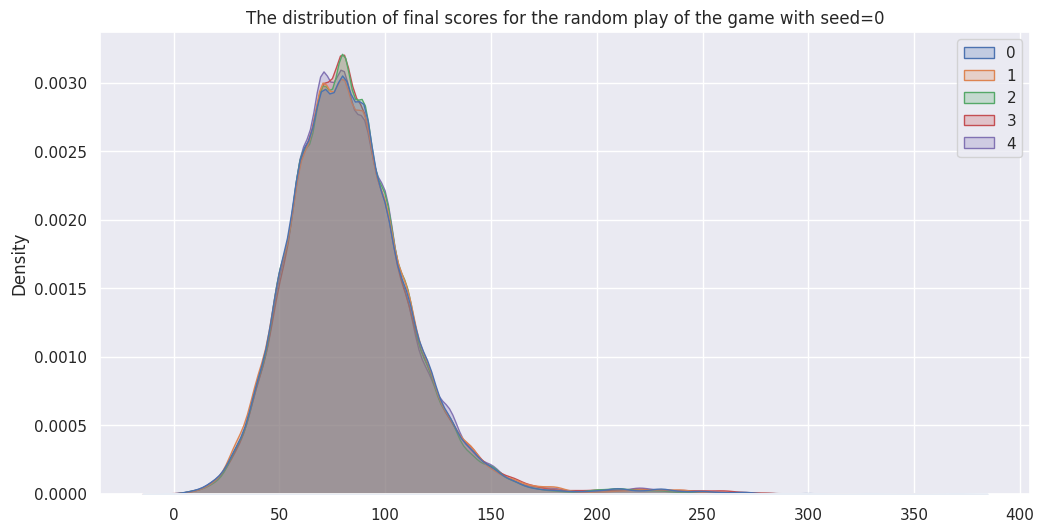

In [6]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=scores, fill=True)
plt.title("The distribution of final scores for the random play of the game with seed=0");

## Symmetries

Since the order of cells is irrelevant for scoring the particular line, and both diagonals are treated equally, the game of Mathematico has a number of symmetries:

* each rotation for a particular position (4)
* horizontal a vertical flips (2)
* special swap one-for-one, when we swap the outer and inner values (01, 03, 14, 34) (e.g. 01):

<div style="display: flex; flex-direction: row">
    <pre>
+--+--+--+--+--+
| 3| 1| 7| 7| 2|
+--+--+--+--+--+
| 2| 5| 6|13| 6|
+--+--+--+--+--+
|13|10| 2|10| 3|
+--+--+--+--+--+
| 9|11| 1|11| 4|
+--+--+--+--+--+
| 3| 8| 6|10| 5|
+--+--+--+--+--+
    </pre>
    <p style="padding:1em">  --(swap rows 0, 1)-->  </p>
    <pre>
+--+--+--+--+--+
| 2| 5| 6|13| 6|
+--+--+--+--+--+
| 3| 1| 7| 7| 2|
+--+--+--+--+--+
|13|10| 2|10| 3|
+--+--+--+--+--+
| 9|11| 1|11| 4|
+--+--+--+--+--+
| 3| 8| 6|10| 5|
+--+--+--+--+--+
    </pre>
    <p style="padding:1em">  --(fix cols 0, 1)-->  </p>
    <pre>
+--+--+--+--+--+
| 5| 2| 6|13| 6|
+--+--+--+--+--+
| 1| 3| 7| 7| 2|
+--+--+--+--+--+
|10|13| 2|10| 3|
+--+--+--+--+--+
|11| 9| 1|11| 4|
+--+--+--+--+--+
| 8| 3| 6|10| 5|
+--+--+--+--+--+
    </pre>
    <p style="padding:1em">  --(fix cols 4-0, 4-1)-->  </p>
    <pre>
+--+--+--+--+--+
| 5| 2| 6| 6|13|
+--+--+--+--+--+
| 1| 3| 7| 2| 7|
+--+--+--+--+--+
|10|13| 2| 3|10|
+--+--+--+--+--+
|11| 9| 1| 4|11|
+--+--+--+--+--+
| 8| 3| 6| 5|10|
+--+--+--+--+--+
    </pre>
    <p style="padding:1em">  --(fix rows 4-0, 4-1)-->  </p>
    <pre>
+--+--+--+--+--+
| 5| 2| 6| 6|13|
+--+--+--+--+--+
| 1| 3| 7| 2| 7|
+--+--+--+--+--+
|10|13| 2| 3|10|
+--+--+--+--+--+
| 8| 3| 6| 5|10|
+--+--+--+--+--+
|11| 9| 1| 4|11|
+--+--+--+--+--+
    </pre>
</div>

In [8]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('..')))

import src.utils.symmetries as symmetries
from IPython.display import display, HTML
from mathematico import Board


def print_symmetries(board):    
    html = '<div style="display: grid; grid-template-columns: repeat(4, 1fr); column-gap: 2em; row-gap: 2em;">'
    for s in symmetries.all_symmetries(board):
        _b = Board()
        _b.grid = s
        html += "<pre>\n" + str(_b) + "\n</pre>"
    html += '</div>'
    display(HTML(html))

print_symmetries(players[0].board.grid)